In [1]:
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

import numpy as np

from catboost import CatBoostRegressor, Pool
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import matplotlib.pyplot as plt
import seaborn as sns
import shap
shap.initjs()

In [2]:
ordinal = pd.read_csv('../Data/BaseOrdinalSH.csv')
ordinal.shape

(2580, 83)

In [3]:
ordinal.head(3)

,Unnamed: 0,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtCond,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,Unnamed: 0.1,PID,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,0,6.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,21.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,1.0,5.0,5.0,6.0,1.0,4.0,1.0,4.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,4.0,9.0,4.0,1,909176150,856,126000,68.516053,7890,6,6,1939,1950,0.0,3,3,3,1.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,3,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0
1,1,0.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,4.0,2.0,1.0,0.0,6.0,6.0,1.0,1.0,5.0,2.0,0.0,1.0,4.0,1.0,4.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,3.0,9.0,4.0,2,905476230,1049,139500,42.000000,4235,5,5,1984,1984,149.0,4,3,4,2.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,4,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0
2,2,6.0,1.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,0.0,5.0,0.0,6.0,1.0,0.0,1.0,4.0,6.0,3.0,5.0,3.0,5.0,4.0,0.0,3.0,4.0,1.0,2.0,1.0,9.0,4.0,3,911128020,1001,124900,60.000000,6060,5,9,1930,2007,0.0,4,3,3,1.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,4,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0


In [4]:
ordinal = ordinal.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinal.shape

(2580, 80)

In [5]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [6]:
CB = CatBoostRegressor()

In [7]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

In [8]:
CB.fit(X, y, verbose=False, plot=False)

In [9]:
cb_results = CB.predict(X)

In [10]:
X_GB = X.assign(CB = cb_results)
X_GB

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtCond,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,CB
0,6.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,21.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,1.0,5.0,5.0,6.0,1.0,4.0,1.0,4.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,4.0,9.0,4.0,856,68.516053,7890,6,6,1939,1950,0.0,3,3,3,1.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,3,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0,124486.611467
1,0.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,4.0,2.0,1.0,0.0,6.0,6.0,1.0,1.0,5.0,2.0,0.0,1.0,4.0,1.0,4.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,3.0,9.0,4.0,1049,42.000000,4235,5,5,1984,1984,149.0,4,3,4,2.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,4,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0,139835.739965
2,6.0,1.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,0.0,5.0,0.0,6.0,1.0,0.0,1.0,4.0,6.0,3.0,5.0,3.0,5.0,4.0,0.0,3.0,4.0,1.0,2.0,1.0,9.0,4.0,1001,60.000000,6060,5,9,1930,2007,0.0,4,3,3,1.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,4,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0,121693.630736
3,11.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,20.0,2.0,2.0,0.0,5.0,1.0,0.0,8.0,8.0,2.0,0.0,5.0,6.0,6.0,1.0,2.0,1.0,4.0,6.0,3.0,5.0,3.0,5.0,5.0,0.0,3.0,4.0,1.0,7.0,3.0,9.0,4.0,1039,80.000000,8146,4,8,1900,2003,0.0,4,4,2,1.0,0.0,0.0,405.0,405.0,717,322,0,0.0,0.0,1,0,2,1,3,6,0,1940.0,1.0,281.0,0,0,168,0,111,0,0,108865.301417
4,10.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,17.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,2.0,2.0,5.0,2.0,6.0,1.0,0.0,1.0,4.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,2.0,3.0,9.0,4.0,1665,70.000000,8400,8,6,2001,2001,0.0,4,3,4,1.0,643.0,0.0,167.0,810.0,810,855,0,1.0,0.0,2,1,3,1,4,6,0,2001.0,2.0,528.0,0,45,0,0,0,0,0,220328.526105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,6.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,3.0,2.0,2.0,0.0,1.0,1.0,0.0,13.0,14.0,2.0,0.0,5.0,6.0,6.0,3.0,1.0,0.0,1.0,6.0,2.0,5.0,3.0,1.0,4.0,1.0,3.0,4.0,1.0,7.0,3.0,9.0,4.0,952,68.516053,8854,6,6,1916,1950,0.0,3,3,3,1.0,0.0,0.0,952.0,952.0,952,0,0,0.0,0.0,1,0,2,1,2,4,1,1916.0,1.0,192.0,0,98,0,0,40,0,0,115754.385658
2576,5.0,5.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,7.0,2.0,2.0,0.0,2.0,3.0,0.0,3.0,14.0,2.0,3.0,3.0,4.0,4.0,1.0,0.0,1.0,0.0,3.0,2.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,3.0,9.0,4.0,1733,68.516053,13680,3,5,1955,1955,0.0,3,3,0,0.0,0.0,0.0,0.0,0.0,1733,0,0,0.0,0.0,2,0,4,1,3,8,1,1955.0,2.0,452.0,0,0,0,0,0,0,0,137604.633152
2577,15.0,4.0,1.0,1.0,3.0,1.0,0.0,4.0,0.0,6.0,2.0,2.0,2.0,5.0,1.0,0.0,8.0,8.0,2.0,1.0,5.0,1.0,6.0,1.0,4.0,0.0,0.0,6.0,3.0,0.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,10.0,1.0,9.0,4.0,2002,82.000000,6270,5,6,1949,1950,0.0,3,3,3,1.0,284.0,0.0,717.0,1001.0,1001,1001,0,0.0,0.0,2,0,4,2,3,8,0,1949.0,3.0,871.0,0,0,0,0,0,0,0,150322.895223
2578,10.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,1.0,2.0,5.0,2.0,6.0,1.0,0.0,1.0,4.0,6.0,5.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,9.0,1.0,9.0,4.0,1842,68.516053,8826,7,5,2000,2000,144.0,4,3,4,1.0,841.0,0.0,144.0,985.0,985,857,0,1.0,0.0,2,1,3,1,4,7,1,2000.0,2.0,486.0,193,

In [11]:
gbm = GradientBoostingRegressor()

In [12]:
gbm.fit(X_GB, y)

GradientBoostingRegressor()

In [13]:
explainer = shap.TreeExplainer(gbm)

In [14]:
shap_values = explainer.shap_values(X_GB)

In [15]:
len(shap_values)

2580

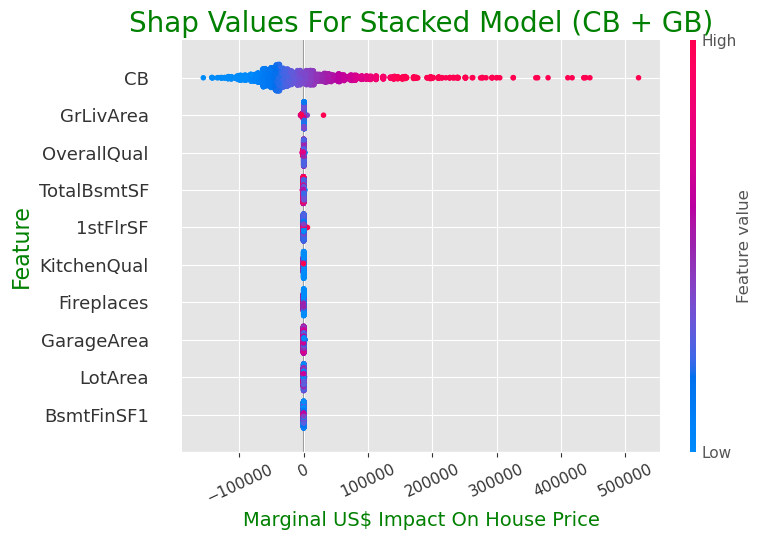

In [16]:
#Shap Global Summary Plot

plt.style.use('default')
plt.style.use('ggplot')

plt.figure(figsize=(8,4))


shap.summary_plot(shap_values, X_GB, show=False, max_display=10)
plt.title('Shap Values For Stacked Model (CB + GB)', fontsize=20, color='Green')

plt.ylabel('Feature', fontsize=16, color='green')
plt.xlabel('Marginal US$ Impact On House Price', fontsize=14, color='green')
plt.xticks(rotation=25)

plt.tight_layout()
plt.show()

In [17]:
X_GB

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtCond,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,CB
0,6.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,21.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,1.0,5.0,5.0,6.0,1.0,4.0,1.0,4.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,4.0,9.0,4.0,856,68.516053,7890,6,6,1939,1950,0.0,3,3,3,1.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,3,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0,124486.611467
1,0.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,4.0,2.0,1.0,0.0,6.0,6.0,1.0,1.0,5.0,2.0,0.0,1.0,4.0,1.0,4.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,3.0,9.0,4.0,1049,42.000000,4235,5,5,1984,1984,149.0,4,3,4,2.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,4,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0,139835.739965
2,6.0,1.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,0.0,5.0,0.0,6.0,1.0,0.0,1.0,4.0,6.0,3.0,5.0,3.0,5.0,4.0,0.0,3.0,4.0,1.0,2.0,1.0,9.0,4.0,1001,60.000000,6060,5,9,1930,2007,0.0,4,3,3,1.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,4,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0,121693.630736
3,11.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,20.0,2.0,2.0,0.0,5.0,1.0,0.0,8.0,8.0,2.0,0.0,5.0,6.0,6.0,1.0,2.0,1.0,4.0,6.0,3.0,5.0,3.0,5.0,5.0,0.0,3.0,4.0,1.0,7.0,3.0,9.0,4.0,1039,80.000000,8146,4,8,1900,2003,0.0,4,4,2,1.0,0.0,0.0,405.0,405.0,717,322,0,0.0,0.0,1,0,2,1,3,6,0,1940.0,1.0,281.0,0,0,168,0,111,0,0,108865.301417
4,10.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,17.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,2.0,2.0,5.0,2.0,6.0,1.0,0.0,1.0,4.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,2.0,3.0,9.0,4.0,1665,70.000000,8400,8,6,2001,2001,0.0,4,3,4,1.0,643.0,0.0,167.0,810.0,810,855,0,1.0,0.0,2,1,3,1,4,6,0,2001.0,2.0,528.0,0,45,0,0,0,0,0,220328.526105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,6.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,3.0,2.0,2.0,0.0,1.0,1.0,0.0,13.0,14.0,2.0,0.0,5.0,6.0,6.0,3.0,1.0,0.0,1.0,6.0,2.0,5.0,3.0,1.0,4.0,1.0,3.0,4.0,1.0,7.0,3.0,9.0,4.0,952,68.516053,8854,6,6,1916,1950,0.0,3,3,3,1.0,0.0,0.0,952.0,952.0,952,0,0,0.0,0.0,1,0,2,1,2,4,1,1916.0,1.0,192.0,0,98,0,0,40,0,0,115754.385658
2576,5.0,5.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,7.0,2.0,2.0,0.0,2.0,3.0,0.0,3.0,14.0,2.0,3.0,3.0,4.0,4.0,1.0,0.0,1.0,0.0,3.0,2.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,3.0,9.0,4.0,1733,68.516053,13680,3,5,1955,1955,0.0,3,3,0,0.0,0.0,0.0,0.0,0.0,1733,0,0,0.0,0.0,2,0,4,1,3,8,1,1955.0,2.0,452.0,0,0,0,0,0,0,0,137604.633152
2577,15.0,4.0,1.0,1.0,3.0,1.0,0.0,4.0,0.0,6.0,2.0,2.0,2.0,5.0,1.0,0.0,8.0,8.0,2.0,1.0,5.0,1.0,6.0,1.0,4.0,0.0,0.0,6.0,3.0,0.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,10.0,1.0,9.0,4.0,2002,82.000000,6270,5,6,1949,1950,0.0,3,3,3,1.0,284.0,0.0,717.0,1001.0,1001,1001,0,0.0,0.0,2,0,4,2,3,8,0,1949.0,3.0,871.0,0,0,0,0,0,0,0,150322.895223
2578,10.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,1.0,2.0,5.0,2.0,6.0,1.0,0.0,1.0,4.0,6.0,5.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,9.0,1.0,9.0,4.0,1842,68.516053,8826,7,5,2000,2000,144.0,4,3,4,1.0,841.0,0.0,144.0,985.0,985,857,0,1.0,0.0,2,1,3,1,4,7,1,2000.0,2.0,486.0,193,

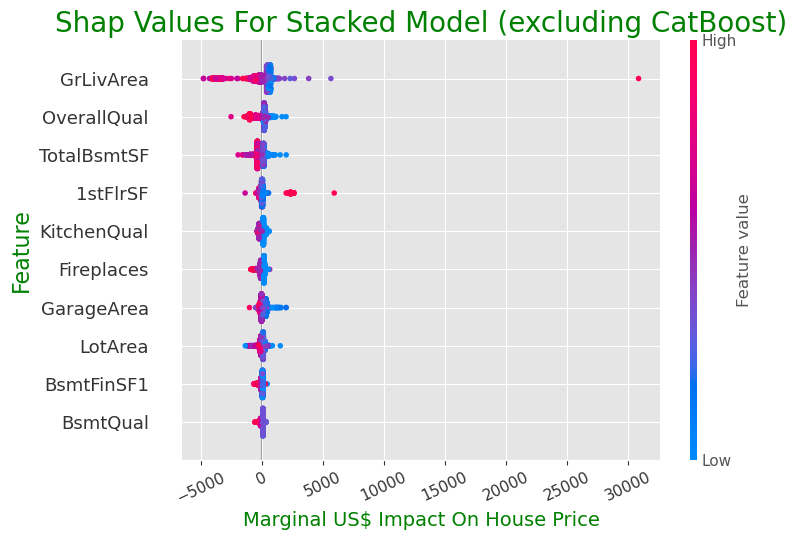

In [18]:
#Shap Global Summary Plot, excluding CB

plt.style.use('default')
plt.style.use('ggplot')

plt.figure(figsize=(8,4))


shap.summary_plot(shap_values[:,:-1], X_GB.iloc[:,:-1], show=False, max_display=10)
plt.title('Shap Values For Stacked Model (excluding CatBoost)', fontsize=20, color='Green')

plt.ylabel('Feature', fontsize=16, color='green')
plt.xlabel('Marginal US$ Impact On House Price', fontsize=14, color='green')
plt.xticks(rotation=25)

plt.tight_layout()
plt.show()